### Importing Librarires

In [282]:
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option('display.max_colwidth',150)  # Set a specific width (e.g., 100 characters)
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [283]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\tmdb_top_rated_movies.csv")

In [284]:
df.head(5)

,id,original_language,overview,release_date,title,popularity,vote_average,vote_count
0,278,en,"Imprisoned in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison...",1994-09-23,The Shawshank Redemption,35.0440,8.708,28176
1,238,en,"Spanning the years 1945 to 1955, a chronicle of the fictional Italian-American Corleone crime family. When organized crime family patriarch, Vito ...",1972-03-14,The Godfather,36.3040,8.687,21363
2,240,en,"In the continuing saga of the Corleone crime family, a young Vito Corleone grows up in Sicily and in 1910s New York. In the 1950s, Michael Corleon...",1974-12-20,The Godfather Part II,17.2441,8.570,12910
3,424,en,The true story of how businessman Oskar Schindler saved over a thousand Jewish lives from the Nazis while they worked as slaves in his factory dur...,1993-12-15,Schindler's List,37.5490,8.564,16380
4,389,en,The defense and the prosecution have rested and the jury is filing into the jury room to decide if a young Spanish-American is guilty or innocent ...,1957-04-10,12 Angry Men,17.0033,8.548,9091


## Dataset Overview

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   original_language  10000 non-null  object 
 2   overview           10000 non-null  object 
 3   release_date       9998 non-null   object 
 4   title              10000 non-null  object 
 5   popularity         10000 non-null  float64
 6   vote_average       10000 non-null  float64
 7   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB


In [286]:
df.shape

(10000, 8)

In [287]:
df.columns

Index(['id', 'original_language', 'overview', 'release_date', 'title',
       'popularity', 'vote_average', 'vote_count'],
      dtype='object')

## Converting Dtype

In [288]:
df["release_date"]=pd.to_datetime(df["release_date"],errors="coerce")

## Dropping Columns For Better Overview

In [289]:
df.drop(columns=["id","overview"],inplace=True)

## `Cleaning Data`

In [290]:
df.isna().sum()

original_language    0
release_date         2
title                0
popularity           0
vote_average         0
vote_count           0
dtype: int64

In [291]:
df.dropna(subset=["release_date"],inplace=True)

In [292]:
print(df.duplicated().sum())  # Count duplicate rows
print(df[df.duplicated()])  # Display duplicate rows


213
     original_language release_date                                     title  \
462                 zh   2000-09-20                                     Yi Yi   
1120                en   2014-06-19                 What We Do in the Shadows   
1204                cn   1985-12-14                              Police Story   
1220                en   1962-10-24                  The Manchurian Candidate   
1320                en   1986-09-24                      The Name of the Rose   
...                ...          ...                                       ...   
9881                en   2016-04-22                                  Holidays   
9940                en   2017-09-22                           Killing Gunther   
9941                en   2022-01-28                                The Requin   
9980                en   1999-03-16  From Dusk Till Dawn 2: Texas Blood Money   
9981                en   1994-06-09         Police Academy: Mission to Moscow   

      popularity  vote_

In [293]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

## Classification Based On Popularity And Votings

In [294]:
popu_film=df.groupby("title")["popularity"].sum().reset_index()
popu_film.sort_values(by="popularity",ascending=False,inplace=True)
popu_film.head(25).style.background_gradient(cmap="Reds")

,title,popularity
240,A Minecraft Movie,517.542500
1414,Captain America: Brave New World,329.158500
2754,G20,288.919100
4968,Novocaine,272.901200
1684,Conclave,172.353600
4592,Moana 2,160.024900
4689,Mufasa: The Lion King,150.054000
6274,Sonic the Hedgehog 3,146.155500
7987,The Passion of the Christ,142.002700
4502,Mickey 17,120.554200


In [295]:
popu_filmx=popu_film.nlargest(25,"popularity")
popu_filmx

,title,popularity
240,A Minecraft Movie,517.5425
1414,Captain America: Brave New World,329.1585
2754,G20,288.9191
4968,Novocaine,272.9012
1684,Conclave,172.3536
4592,Moana 2,160.0249
4689,Mufasa: The Lion King,150.0540
6274,Sonic the Hedgehog 3,146.1555
7987,The Passion of the Christ,142.0027
4502,Mickey 17,120.5542


In [296]:
df[df["title"] == "#Alive"]
df[df["title"]=="A Minecraft Movie"] #Highest Popularity Movie

,original_language,release_date,title,popularity,vote_average,vote_count
7267,en,2025-03-31,A Minecraft Movie,517.5425,6.2,705


## Visualization

C:\Users\user\AppData\Local\Temp\ipykernel_20836\1265543478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popu_filmx,x="title",y="popularity",palette="Paired")


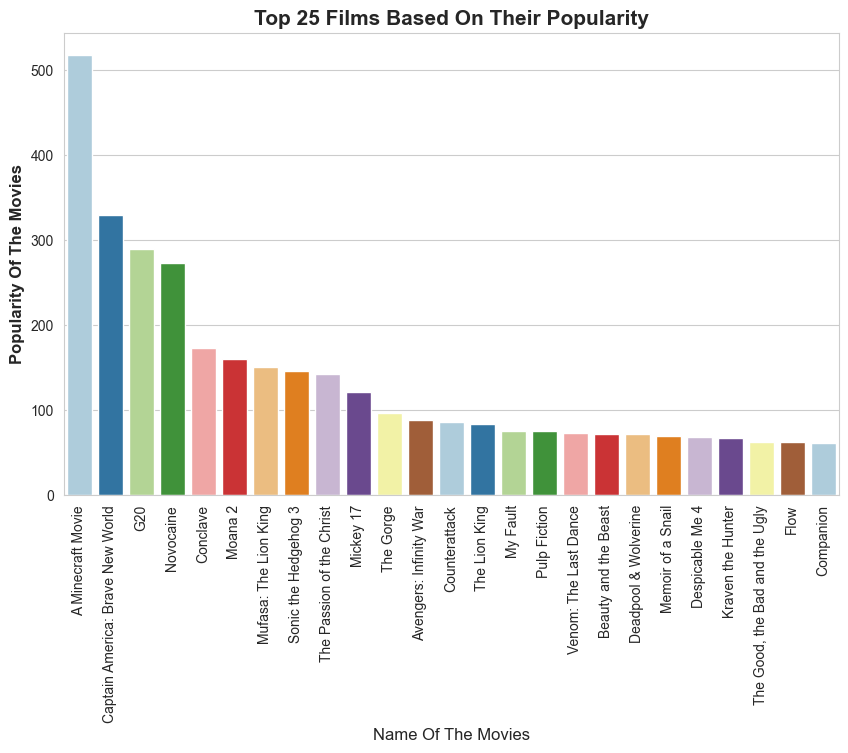

In [297]:
#Visualization
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=popu_filmx,x="title",y="popularity",palette="Paired")
plt.xticks(rotation=90 )
plt.xlabel("Name Of The Movies",fontweight=12,fontsize=12)
plt.ylabel("Popularity Of The Movies",fontweight="bold",fontsize=12)
plt.title("Top 25 Films Based On Their Popularity",fontsize=15,fontweight="bold")
plt.show()

In [298]:
lang_classifi=df["original_language"].value_counts().reset_index()
lang_classifi.head(25).style.background_gradient(cmap="Blues")


,original_language,count
0,en,7716
1,fr,637
2,it,349
3,ja,281
4,es,182
5,de,97
6,ko,86
7,zh,60
8,cn,56
9,ru,48


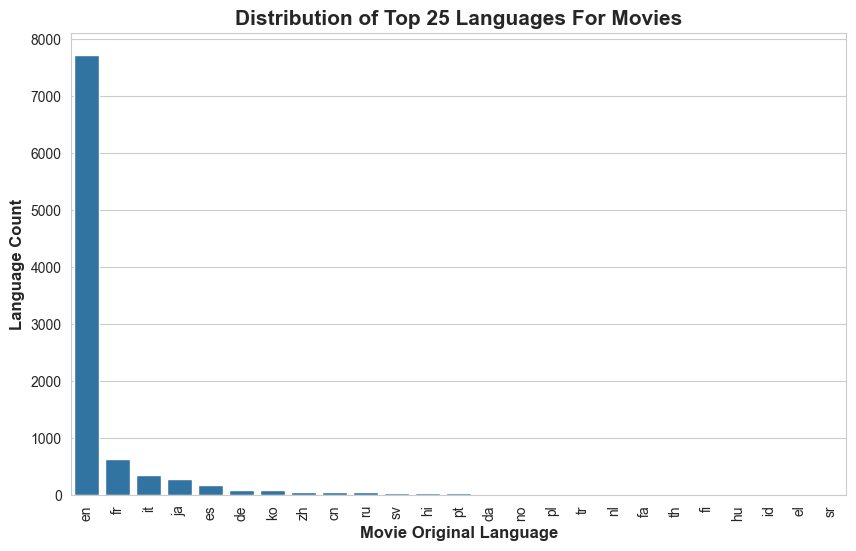

In [299]:
lang_classifi = df["original_language"].value_counts().reset_index()
lang_classifi.columns = ["Language", "Count"]
lang_classifix=lang_classifi.nlargest(25,"Count")
plt.figure(figsize=(10,6))
sns.barplot(x="Language", y="Count", data=lang_classifix)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title("Distribution of Top 25 Languages For Movies",fontsize=15,fontweight="bold")
plt.xlabel("Movie Original Language",fontsize=12,fontweight="bold")
plt.ylabel("Language Count",fontsize=12,fontweight="bold")
plt.show()


In [300]:
#Recentle released movies 
Recent_release=df.nlargest(25,"release_date").reset_index()
Recent_release[["title","release_date"]]


,title,release_date
0,G20,2025-04-09
1,A Minecraft Movie,2025-03-31
2,The Life List,2025-03-27
3,Novocaine,2025-03-12
4,Black Bag,2025-03-12
5,Holland,2025-03-09
6,The Electric State,2025-03-07
7,Mickey 17,2025-02-28
8,Counterattack,2025-02-27
9,The Monkey,2025-02-14


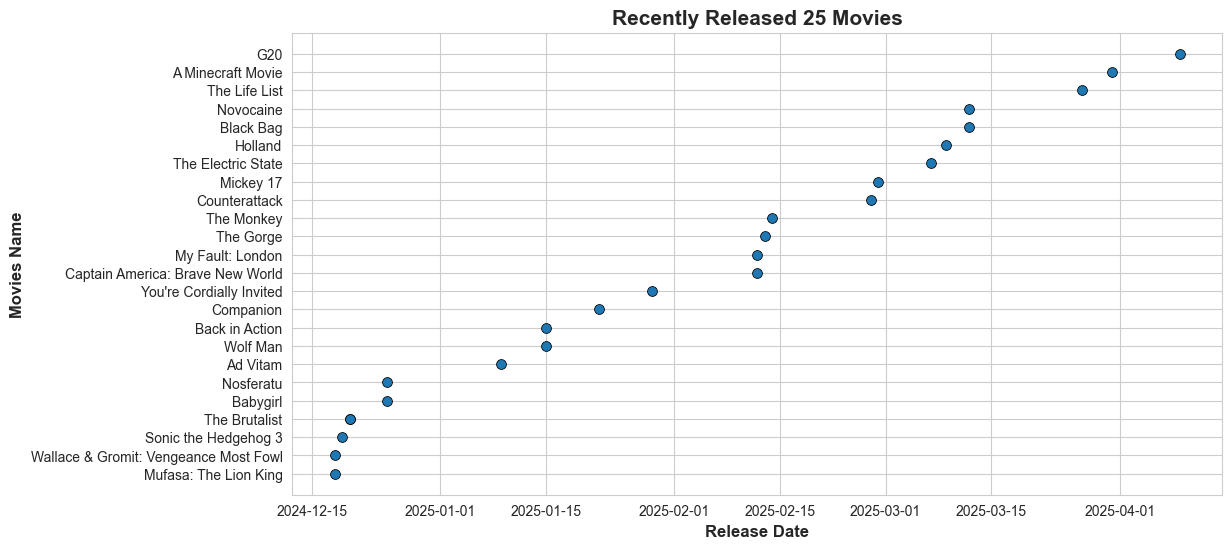

In [301]:
#Visualization of recently released movies 
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.scatterplot(data=Recent_release,x="release_date",y="title",edgecolors="black",s=50)
plt.xlabel("Release Date",fontsize=12,fontweight="bold")
plt.ylabel("Movies Name",fontsize=12,fontweight="bold")
plt.title("Recently Released 25 Movies",fontsize=15,fontweight="bold")
plt.show()

## Machine Learning

In [302]:
df.head(5)

,original_language,release_date,title,popularity,vote_average,vote_count
0,en,1994-09-23,The Shawshank Redemption,35.0440,8.708,28176
1,en,1972-03-14,The Godfather,36.3040,8.687,21363
2,en,1974-12-20,The Godfather Part II,17.2441,8.570,12910
3,en,1993-12-15,Schindler's List,37.5490,8.564,16380
4,en,1957-04-10,12 Angry Men,17.0033,8.548,9091


In [303]:
#Extracting Release Year And Month
df["release_year"]=df["release_date"].dt.year
df['release_month'] = df['release_date'].dt.month


In [304]:
le=LabelEncoder()
df["language_encoded"]=le.fit_transform(df["original_language"])

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_language  9785 non-null   object        
 1   release_date       9785 non-null   datetime64[ns]
 2   title              9785 non-null   object        
 3   popularity         9785 non-null   float64       
 4   vote_average       9785 non-null   float64       
 5   vote_count         9785 non-null   int64         
 6   release_year       9785 non-null   int32         
 7   release_month      9785 non-null   int32         
 8   language_encoded   9785 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(2)
memory usage: 688.0+ KB


In [306]:
df.columns

Index(['original_language', 'release_date', 'title', 'popularity',
       'vote_average', 'vote_count', 'release_year', 'release_month',
       'language_encoded'],
      dtype='object')

In [307]:
#Selecting Features And Target
# Log-transform popularity
df['log_popularity'] = np.log1p(df['popularity'])

X=df.drop(columns=["original_language","release_date","title","log_popularity","popularity"])
y = df["log_popularity"]

In [308]:
print(X.dtypes)

vote_average        float64
vote_count            int64
release_year          int32
release_month         int32
language_encoded      int64
dtype: object


In [309]:
print(X.dtypes)  # Check if all features are numerical


vote_average        float64
vote_count            int64
release_year          int32
release_month         int32
language_encoded      int64
dtype: object


In [310]:
# Split into training and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [311]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

#Evaluation
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"The Mean Squard Error Score Is: {mse:.2f}")
print(f"The r2 Score Is:{r2:.2f}")


The Mean Squard Error Score Is: 0.15
The r2 Score Is:0.63


In [312]:
m=model.score(X_train, y_train)
n=model.score(X_test, y_test)
print(f"The model score for x and y train is : {m:.2f}, and The model score for x and y test is {n:.2f}")

The model score for x and y train is : 0.95, and The model score for x and y test is 0.63


In [313]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {scores}")
print(f"Mean CV R² Score: {scores.mean():.4f}")


Cross-Validation R² Scores: [0.65034835 0.62668832 0.58060144 0.50186255 0.3987012 ]
Mean CV R² Score: 0.5516


In [314]:
print("Min popularity:", df['popularity'].min())
print("Max popularity:", df['popularity'].max())
print("Mean popularity:", df['popularity'].mean())


Min popularity: 0.0075
Max popularity: 517.5425
Mean popularity: 5.835148359734287


In [315]:
df.head()

,original_language,release_date,title,popularity,vote_average,vote_count,release_year,release_month,language_encoded,log_popularity
0,en,1994-09-23,The Shawshank Redemption,35.0440,8.708,28176,1994,9,8,3.584740
1,en,1972-03-14,The Godfather,36.3040,8.687,21363,1972,3,8,3.619101
2,en,1974-12-20,The Godfather Part II,17.2441,8.570,12910,1974,12,8,2.903842
3,en,1993-12-15,Schindler's List,37.5490,8.564,16380,1993,12,8,3.651930
4,en,1957-04-10,12 Angry Men,17.0033,8.548,9091,1957,4,8,2.890555


In [316]:
print(X_train.columns)


Index(['vote_average', 'vote_count', 'release_year', 'release_month',
       'language_encoded'],
      dtype='object')


## `New Movie Prediction`

In [ ]:
# New movie Predictyion Output
new_movie = pd.DataFrame([{
    "vote_average": 8.5,
    "vote_count": 20000,
    "release_year": 2025,
    "release_month": 5,
    "language_encoded": le.transform(["en"])[0]
}])

# Predict log popularity
log_pred = model.predict(new_movie)[0]

# Reverse log
predicted_popularity = np.expm1(log_pred)

print(f"Predicted Popularity (Adjusted): {predicted_popularity:.2f}")


Predicted Popularity (Adjusted): 23.80
